# Projeto 13: Compressão de imagens  

# Etapa 1: Importação das biblitoecas

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import pandas as pd
import seaborn as sns
import pickle
import zipfile
import random
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.15.0'

# Etapa 2: Carregamento da base de dados

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/My Drive/traffic-signs-data.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")#Read the zip file
zip_object.extractall("./")#Extract the zip file
zip_object.close()#Close the reader

In [4]:
with open("traffic-signs-data/train.p", mode='rb') as training_data:#Read the training data
    train = pickle.load(training_data)#Storage training data
with open("traffic-signs-data/valid.p", mode='rb') as validation_data:#Read the validation data
    valid = pickle.load(validation_data)#Storage validation data
with open("traffic-signs-data/test.p", mode='rb') as testing_data:#Read the testing data
    test = pickle.load(testing_data)#Storage testing data

In [5]:
X_train, y_train = train['features'], train['labels']#Separate between features and labels[features, labels]
X_validation, y_validation = valid['features'], valid['labels']#Separate between features and labels[features, labels]
X_test, y_test = test['features'], test['labels']#Separate between features and labels[features, labels]

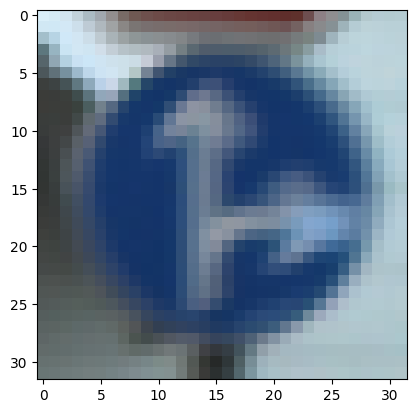

In [6]:
plt.imshow(X_train[1105])

# Etapa 3: Visualização dos dados

In [7]:
X_train.shape

(34799, 32, 32, 3)

In [8]:
X_test.shape

(12630, 32, 32, 3)

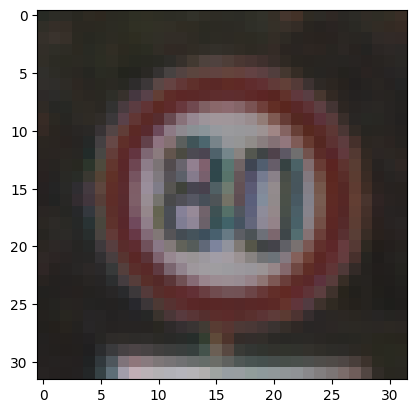

In [9]:
i = random.randint(1,34000)
plt.imshow( X_train[i] , cmap = 'gray')

In [10]:
label = y_train[i]
label

5

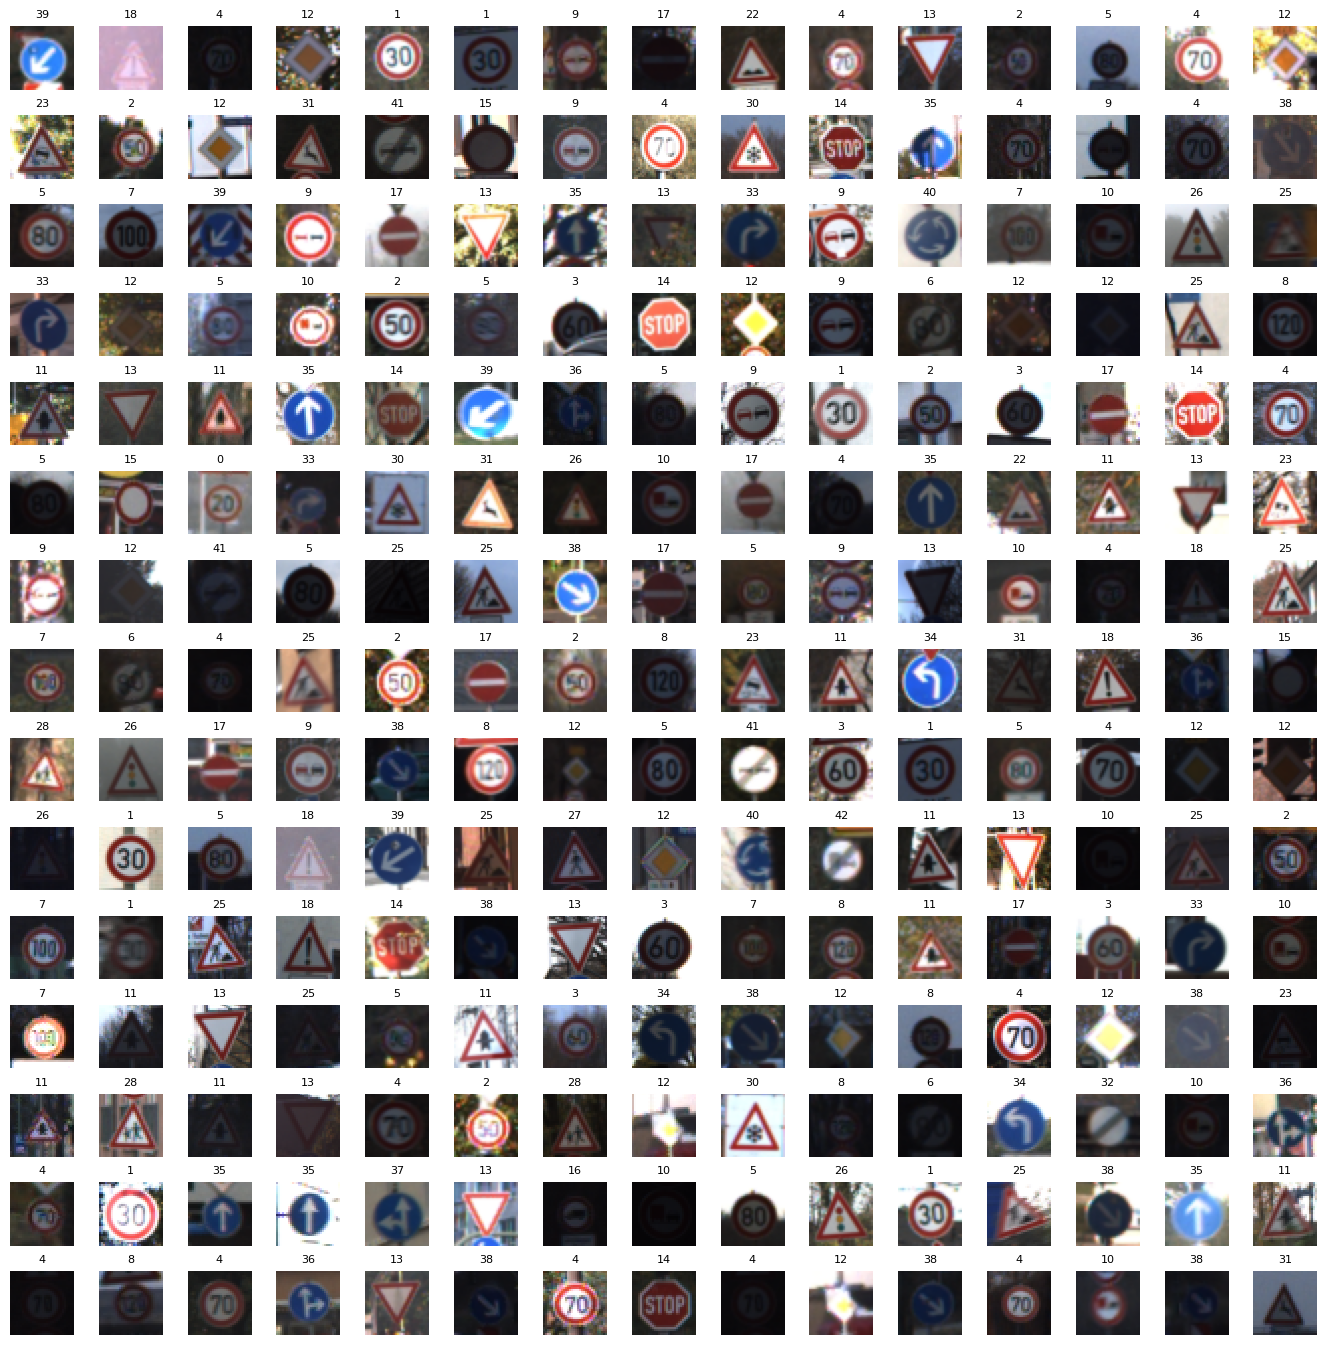

In [11]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel()
n_training = len(X_train)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow( X_train[index] )
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

# Etapa 4: Pré-processamento

In [12]:
#Normalize the image, putting it in the 0 to 1 scale
X_train = X_train / 255
X_test = X_test / 255

# Etapa 5: Criação e treinamento do autoencoder

In [13]:
autoencoder = tf.keras.models.Sequential()

# Encoder
autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), strides=1, padding="same", input_shape=(32, 32, 3)))#Add a convolutional layer
autoencoder.add(tf.keras.layers.BatchNormalization())#Do a normalization of the data
autoencoder.add(tf.keras.layers.Activation('relu'))#Apply the activation function layer
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same"))# Apply a avarage pooling

autoencoder.add(tf.keras.layers.Conv2D(32, (3,3), strides=1, padding="same"))#Add a convolutional layer
autoencoder.add(tf.keras.layers.BatchNormalization())#Do a normalization of the data
autoencoder.add(tf.keras.layers.Activation('relu'))#Apply the activation function layer
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same"))# Apply a avarage pooling

autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same"))#Add a convolutional layer
autoencoder.add(tf.keras.layers.BatchNormalization())#Do a normalization of the data
autoencoder.add(tf.keras.layers.Activation('relu'))#Apply the activation function layer

# Encoded image (Code Layer)
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same"))

# Decoder
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same"))#Add a convolutional layer
autoencoder.add(tf.keras.layers.BatchNormalization())#Do a normalization of the data
autoencoder.add(tf.keras.layers.Activation('relu'))#Apply the activation function layer
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))# undo the avarage pooling

autoencoder.add(tf.keras.layers.Conv2D(32, (3,3), strides=1, padding="same"))#Add a convolutional layer
autoencoder.add(tf.keras.layers.BatchNormalization())#Do a normalization of the data
autoencoder.add(tf.keras.layers.Activation('relu'))#Apply the activation function layer
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))# Undo the avarage pooling

autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), strides=1, padding="same"))#Add a convolutional layer
autoencoder.add(tf.keras.layers.BatchNormalization())#Do a normalization of the data
autoencoder.add(tf.keras.layers.Activation('relu'))#Apply the activation function layer
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))# Undo the avarage pooling

autoencoder.add(tf.keras.layers.Conv2D(3, (3,3), strides=1, activation='sigmoid', padding="same"))

In [14]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.01))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 average_pooling2d (Average  (None, 16, 16, 64)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 32)        1

In [15]:
autoencoder.fit(X_train,
          X_train,
          epochs=20,
          batch_size=200,
          validation_data=(X_test, X_test))
#Do the neural network training


Epoch 1/20
174/174 [==============================] - 17s 52ms/step - loss: 0.5045 - val_loss: 0.5975
Epoch 2/20
174/174 [==============================] - 5s 27ms/step - loss: 0.4864 - val_loss: 0.5401
Epoch 3/20
174/174 [==============================] - 5s 29ms/step - loss: 0.4830 - val_loss: 0.4862
Epoch 4/20
174/174 [==============================] - 5s 26ms/step - loss: 0.4805 - val_loss: 0.4781
Epoch 5/20
174/174 [==============================] - 4s 25ms/step - loss: 0.4790 - val_loss: 0.4782
Epoch 6/20
174/174 [==============================] - 4s 25ms/step - loss: 0.4776 - val_loss: 0.4747
Epoch 7/20
174/174 [==============================] - 5s 26ms/step - loss: 0.4769 - val_loss: 0.4744
Epoch 8/20
174/174 [==============================] - 4s 24ms/step - loss: 0.4760 - val_loss: 0.4757
Epoch 9/20
174/174 [==============================] - 4s 24ms/step - loss: 0.4751 - val_loss: 0.4751
Epoch 10/20
174/174 [==============================] - 5s 27ms/step - loss: 0.4746 - val_l

# Etapa 6: Avaliação do modelo

In [16]:
predicted = autoencoder.predict(X_test[:10].reshape(-1, 32, 32, 3)) #Try predict 10 objects

1/1 [==============================] - 1s 566ms/step


In [17]:
predicted.shape

(10, 32, 32, 3)

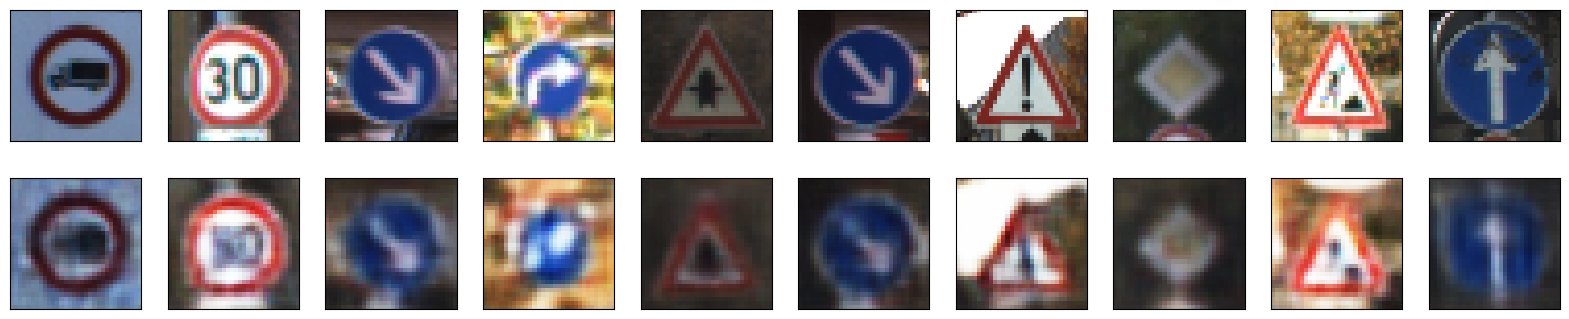

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([X_test[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((32, 32, 3)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)